<a href="https://colab.research.google.com/github/dudgus1286/pandas/blob/main/matplotlib/11_%EC%9B%90_%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# matplotlib 한글 처리

!pip install koreanize_matplotlib

# 나눔 글꼴 설치
!apt -qq -y install fonts-nanum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 13.7 MB/s eta 0:00:00
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd

In [3]:
for fpath in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
  fm.fontManager.addfont(fpath)

plt.rc("font",family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### [실습1]

In [5]:
values = [30,25,20,13,10,2]
labels = ['Python', 'Java', 'javaScript', 'C#', 'C/C++', 'etc']

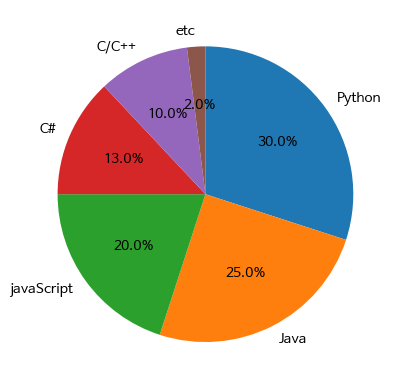

In [ ]:
# plt.plot() : 선 차트
# plt.bar() / barh() : 막대 차트 (x축 기준/y축 기준)

plt.pie(values, labels=labels, autopct="%.1f%%", startangle=90, counterclock=False);

- autopct : 원 안에 표시할 % 포맷
- startangle : 안 주는 경우 오른쪽 15도 정도에서 시작해서 시계 반대 방향으로 원이 돌아가게 됨, 각도를 주게 되면 그 각도를 기준으로 시계 반대 방향으로 원이 그려짐
- counterclock=False : 시계 방향으로 원이 작성되도록 함

#### [실습2] 원 조각 내기

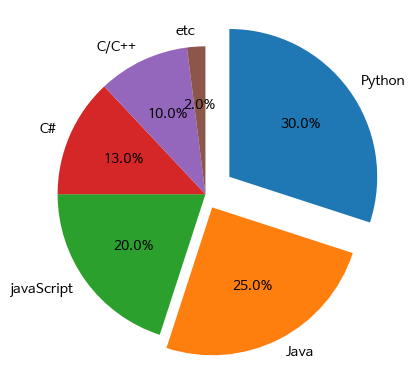

In [7]:
explode = [ 0.2, 0.1, 0, 0, 0, 0 ]

plt.pie(values, labels=labels, autopct="%.1f%%", startangle=90, counterclock=False, explode = explode);

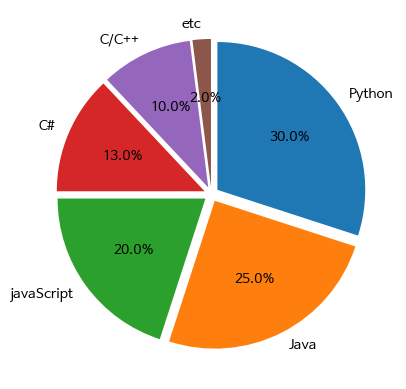

In [8]:
explode = [ 0.05 ] *6

plt.pie(values, labels=labels, autopct="%.1f%%", startangle=90, counterclock=False, explode = explode);

#### [실습3] 범례

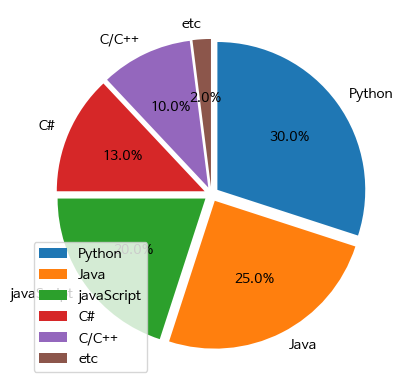

In [ ]:
plt.pie(values, labels=labels, autopct="%.1f%%", startangle=90, counterclock=False, explode = explode)
plt.legend();

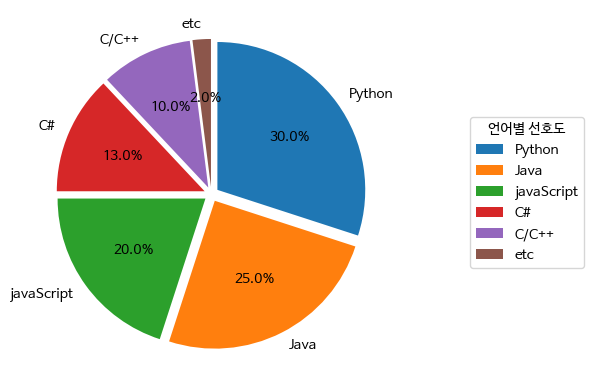

In [ ]:
plt.pie(values, labels=labels, autopct="%.1f%%", startangle=90, counterclock=False, explode = explode)
plt.legend(loc=(1.2, 0.3), title="언어별 선호도");

## 심화

### 1) 색상 변경

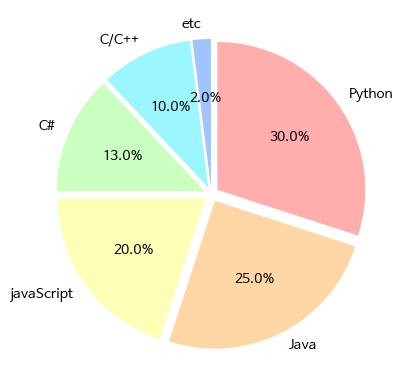

In [10]:
colors = ['#ffadad', '#ffd6a5', '#fdffb6', "#caffbf", "#9bf6ff", "#a0c4ff"]
plt.pie(values, labels=labels, autopct="%.1f%%", startangle=90, counterclock=False, explode = explode, colors=colors);

### 2) wedgeprops() : 도넛 모양 형태로 구성

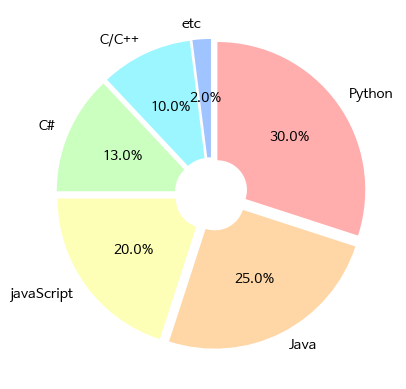

In [19]:
wedgeprops = {"width": 0.8}
plt.pie(values, labels=labels, autopct="%.1f%%", startangle=90, counterclock=False, explode = explode, colors=colors, wedgeprops=wedgeprops);

#### explode 대신에 wedgeprops 이용

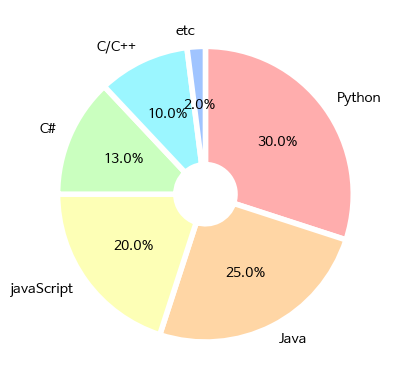

In [26]:
wedgeprops = {"width": 0.8, "edgecolor": 'w', 'linewidth':4}
plt.pie(values, labels=labels, autopct="%.1f%%", startangle=90, counterclock=False, colors=colors, wedgeprops=wedgeprops);

### 3) autopct 커스텀

In [16]:
def custom_autopct(pct):
  # if pct >= 10:
  #   return "%.1f%%" % pct
  # else:
  #   return ""
  return "%.1f%%" % pct if pct >= 10 else ""

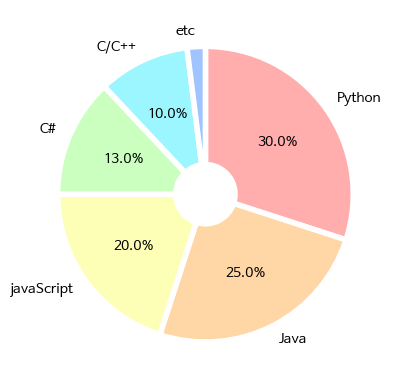

In [27]:
plt.pie(values, labels=labels, autopct=custom_autopct, startangle=90, counterclock=False, colors=colors, wedgeprops=wedgeprops);

### [실습]

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/data/student.csv")
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
0,채치수,북산고,197,90,85,100,95,85,Python
1,정대만,북산고,184,40,35,50,55,25,Java
2,송태섭,북산고,168,80,75,70,80,75,Javascript
3,서태웅,북산고,187,40,60,70,75,80,NaN
4,강백호,북산고,188,15,20,10,35,10,NaN
5,변덕규,능남고,202,80,100,95,85,80,C
6,황태산,능남고,188,55,65,45,40,35,PYTHON
7,윤대협,능남고,190,100,85,90,95,95,C#


In [ ]:
# 학교별 인원수 변수에 담기
df_grb = df.groupby("학교").size()
df_grb

학교
능남고    3
북산고    5
dtype: int64

In [ ]:
df_grb["능남고"]

3

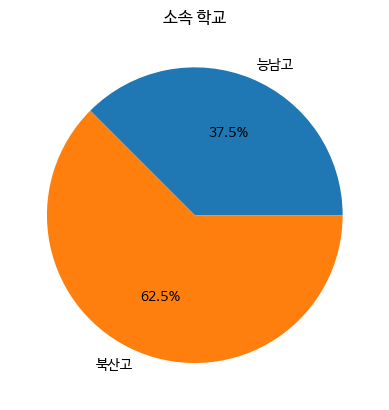

In [ ]:
values = [df_grb["능남고"], df_grb["북산고"]]
labels = ["능남고", "북산고"]

plt.title("소속 학교")
plt.pie(values, labels= labels, autopct="%.1f%%" );